# Hw2

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:
datapath = "./Reviews.csv"
df = pd.read_csv(datapath)
df = df[:10000]

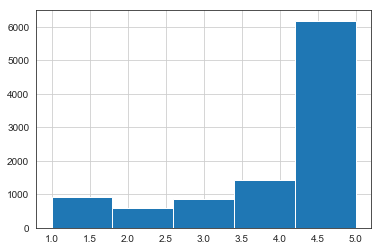

In [12]:
df['Score'].hist(bins=5)

## 1. Top-10 Reviewer

In [13]:
count = df.groupby(['UserId','ProfileName'])['Score'].agg({'Score Count':"count", 'Score mean':np.mean}).sort_values(by='Score Count', ascending=False)
print(count[:10])

                                                           Score Count  \
UserId         ProfileName                                               
A1Z54EM24Y40LL c2                                                   17   
A2SZLNSI5KOQJT Carrie, "Formerly &#34;Sister Carrie&#34;"           10   
A35R32TA60XD57 M. Torma                                              9   
A281NPSIMI1C2R Rebecca of Amazon "The Rebecca Review"                8   
A3OXHLG6DIBRW8 C. F. Hill "CFH"                                      7   
A3NHUQ33CFH3VM Citizen John                                          7   
A3PJZ8TU8FDQ1K Jared Castle                                          7   
AQ6SHOW0VMZGF  K. Padgett "familyof5"                                6   
A26NFIQ7KWI8Y7 kt rose                                               6   
A10H24TDLK2VDP William Jens Jensen                                   6   

                                                           Score mean  
UserId         ProfileName             

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


## 2. Plot score distribution for the user with the most number of reviews

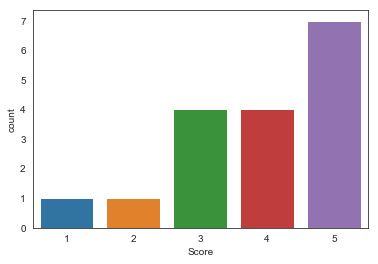

In [14]:
user = df[df.ProfileName == 'c2']['Score']
sns.set_style("white")
sns.countplot(user)

## 3. Plot pandas Series DataFrame

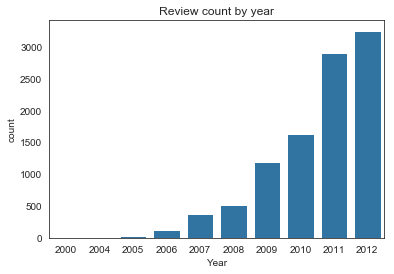

In [15]:
time = pd.to_datetime(df['Time'], unit='s')
df["Year"] = pd.to_datetime(time).dt.year
plt.title('Review count by year')
plt.xlabel('Review year')
plt.ylabel('Review count')
base_color = sns.color_palette()[0]
sns.countplot(x = df['Year'], color = base_color)

## 4. Plot HeatMap using seaborn

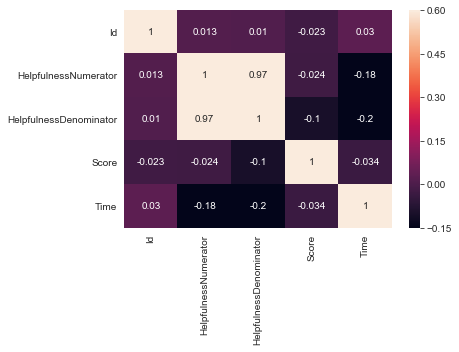

In [16]:
data = df[['Id','HelpfulnessNumerator','HelpfulnessDenominator','Score','Time']]
sns.heatmap(data.corr(),annot=True,vmin=-0.15,vmax=0.6)

## 5. Helpful percent

In [17]:
numerator = df['HelpfulnessNumerator']
denominator = df['HelpfulnessDenominator']
x = numerator / denominator
def mapping(x):
    if x >= 0 and x <= 1:
        return x
    else:
        return -1

impossible = list(filter(lambda x: x < 1, x))
ratio = x.apply(mapping, impossible)

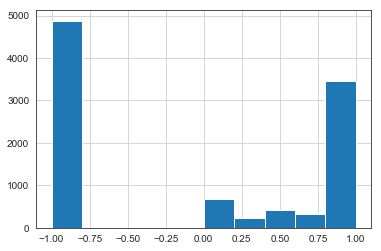

In [18]:
ratio.hist()